In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [7]:
ROOT_DIR = "../"
FIGURE_DIR = os.path.join(ROOT_DIR, "figures")
RESULT_DIR = os.path.join(ROOT_DIR, "results")

In [8]:
os.makedirs(os.path.join(FIGURE_DIR, "rec_system"), exist_ok=True)

In [9]:
def savefigDF(ax, file_name):
    fig = ax.get_figure()
    fig.savefig(f"{file_name}.pdf", bbox_inches="tight")
    fig.savefig(f"{file_name}.svg", bbox_inches="tight")

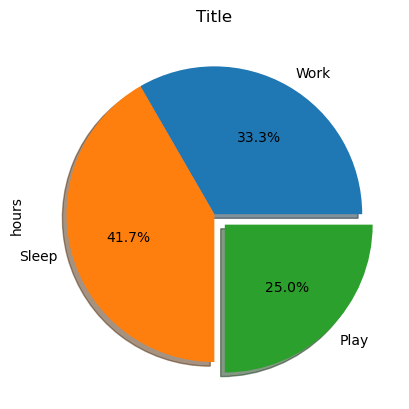

In [10]:
df = pd.DataFrame({"activity": ["Work", "Sleep", "Play"], "hours": [8, 10, 6]})
df.set_index("activity", inplace=True)
ax = df.plot.pie(
    y="hours",
    title="Title",
    legend=False,
    autopct="%1.1f%%",
    explode=(0, 0, 0.1),
    shadow=True,
    startangle=0,
)

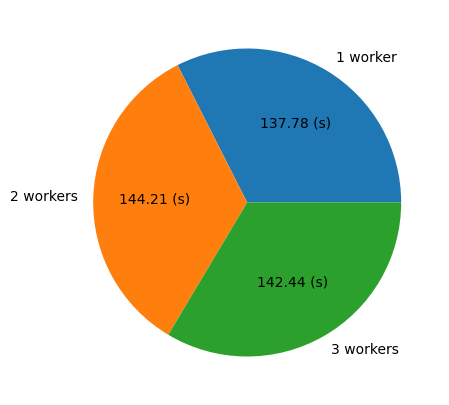

In [11]:
values = [137.77581, 144.21192, 142.44384]
df = pd.DataFrame(
    {"Time (s)": values},
    index=["1 worker", "2 workers", "3 workers"],
)

ax = df.plot.pie(
    y="Time (s)",
    figsize=(5, 5),
    autopct=lambda p: "{:,.2f} (s)".format(p * sum(values) / 100),
    legend=False,
    labels=df.index,
)
ax.set_ylabel(None)
path = os.path.join(FIGURE_DIR, "rec_system", "diff_number_worker")
savefigDF(ax, path)

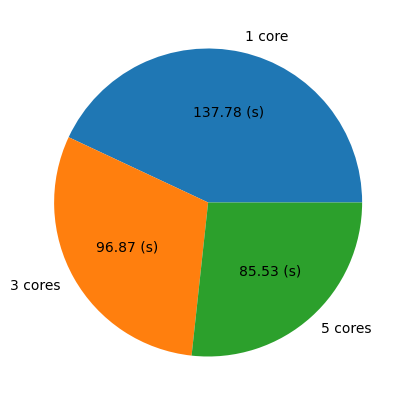

In [12]:
values = [137.77581, 96.87037, 85.52570]
df = pd.DataFrame(
    {"Time (s)": [137.77581, 96.87037, 85.52570]},
    index=["1 core", "3 cores", "5 cores"],
)

ax = df.plot.pie(
    y="Time (s)",
    figsize=(5, 5),
    autopct=lambda p: "{:,.2f} (s)".format(p * sum(values) / 100),
    legend=False,
    labels=df.index,
)
ax.set_ylabel(None)
savefigDF(
    ax,
    os.path.join(FIGURE_DIR, "rec_system", "different_number_core"),
)

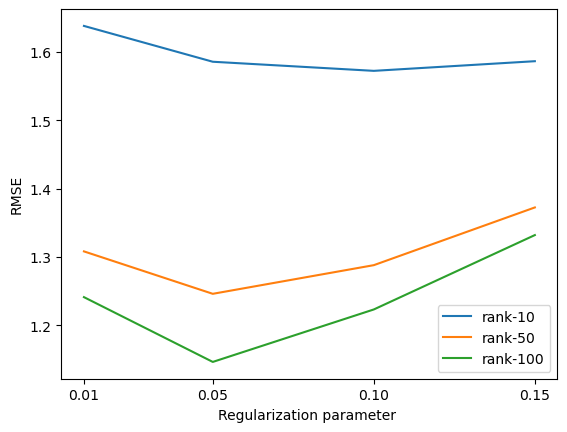

In [13]:
df = dict()
range_regparam = [0.01, 0.05, 0.1, 0.15]
for rank in [10, 50, 100]:
    df[f"rank-{rank}"] = list()
    for regparam in range_regparam:
        path = os.path.join(
            RESULT_DIR,
            "model",
            "result",
            f"model_{rank}_{regparam}.json",
        )
        with open(path) as json_file:
            data = json.load(json_file)
            df[f"rank-{rank}"].append(data["rmse"])
df = pd.DataFrame(df, index=range_regparam)
ax = df.plot.line(xlabel="Regularization parameter ", ylabel="RMSE")
ax.set_xticks(range_regparam)
path = os.path.join(FIGURE_DIR, "rec_system", "als_tuning")
savefigDF(ax, path)